In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. 使用pandas讀檔

In [7]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 取出所有的age & sex作題目，和survived作為答案並分成三個同名的numpy array

In [8]:
df.shape

(891, 12)

In [24]:
age = np.array(df.Age)
sex = np.array(df.Sex)
survived = np.array(df.Survived)

## 3. 其中，由於Age有一些值是空值NaN，請把這些空值都先換成0。提示： 可使用 np.isnan(某個你想確認是不是NaN的年齡) ）

In [25]:
age[np.isnan(age)] = 0

## 4. Sex部分把Male都換成0，Female都換成1 

In [34]:
sex[sex=="male"] = 0
sex[sex=="female"] = 1

## 5.請把Sex和Age兩個array合併成一個

In [35]:
data = np.c_[sex, age]
data

array([[0, 22.0],
       [1, 38.0],
       [1, 26.0],
       ...,
       [1, 0.0],
       [0, 26.0],
       [0, 32.0]], dtype=object)

## 6..實際拿svm 訓練看看，並用同樣的data，preict看看結果 

In [36]:
from sklearn.svm import SVC

In [37]:
clf = SVC(gamma='auto')
clf.fit(data, survived)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
survived_predict = clf.predict(data)

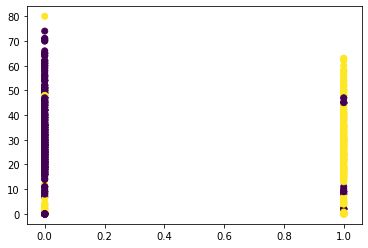

In [39]:
plt.scatter(data[:, 0], data[:, 1], c = survived_predict)

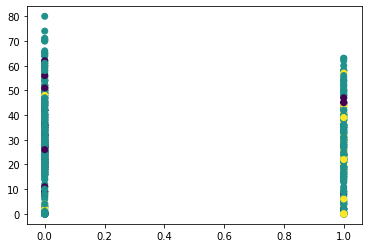

In [40]:
plt.scatter(data[:, 0], data[:, 1], c = survived_predict-survived)